In [192]:
import pandas as pd, numpy as np, json, os

In [193]:
base_url='http://www.cdep.ro'

In [194]:
os.chdir('C:/users/csala/Onedrive - Lancaster University/datarepo/influence/ro')

In [195]:
nmembers=json.loads(open('data/nmembers.json','r').read())

In [196]:
img=json.loads(open('data/img.json','r').read())

In [197]:
records=json.loads(open('data/records.json','r').read())

In [134]:
votes=json.loads(open('data/votes.json','r').read())

In [198]:
nvotes=json.loads(open('data/nvotes.json','r').read())

In [199]:
records[9]

{'votid': '318',
 'vot': 'DA',
 'grup': 'PSD',
 'name': 'Timiş Ioan',
 'camera': '2'}

In [200]:
votes[0]

{'votid': '318',
 'descriere': 'Pl-x 596/2005',
 'time': '06.02.2006 17:13',
 'camera': '2'}

In [201]:
nvotes[0]

{'votid': '318',
 'descriere': 'Pl-x 596/2005',
 'time': '06.02.2006 17:13',
 'camera': '2',
 'type': 'PL',
 'lung': 'Proiect de Lege pentru ratificarea Acordului între România şi Confederaţia Elveţiană privind cooperarea în combaterea terorismului, criminalităţii organizate, a traficului ilicit de stupefiante, substanţe psihotrope şi precursori, precum şi a altor infracţiuni transnaţionale, semnat la Bucureşti la 19 septembrie 2005',
 'lege': '596/2005',
 'link': 'http://www.cdep.ro/pls/proiecte/upl_pck2015.proiect?cam=2&idp=6897'}

In [705]:
dr=pd.DataFrame(records)
dr['votid']=dr['votid'].astype(int)

In [706]:
dv=pd.DataFrame(nvotes)[['time','votid','lung','type','lege']]
dv['votid']=dv['votid'].astype(int)

In [707]:
df.head()

,votid,camera,grup,name,vot,time,lung,type,lege,years
893,316,2,PD-L,Mocanu Alexandru,DA,06.02.2006 16:59,Proiect de Lege pentru abrogarea unor preveder...,PL,621/2005,2006-02-06
894,316,2,neafiliat,Ovidenie Costel,DA,06.02.2006 16:59,Proiect de Lege pentru abrogarea unor preveder...,PL,621/2005,2006-02-06
895,316,2,PNL,Calimente Mihăiţă,DA,06.02.2006 16:59,Proiect de Lege pentru abrogarea unor preveder...,PL,621/2005,2006-02-06
896,316,2,PNL,Oancea Viorel,DA,06.02.2006 16:59,Proiect de Lege pentru abrogarea unor preveder...,PL,621/2005,2006-02-06
897,316,2,PD-L,Bardan Cornel Ştefan,DA,06.02.2006 16:59,Proiect de Lege pentru abrogarea unor preveder...,PL,621/2005,2006-02-06


In [708]:
dv.head()

,time,votid,lung,type,lege
0,06.02.2006 17:13,318,Proiect de Lege pentru ratificarea Acordului î...,PL,596/2005
1,06.02.2006 17:22,320,Proiect de Lege pentru ratificarea Acordului î...,PL,640/2005
2,06.02.2006 17:29,321,Retrimitere comisie,Other,
3,06.02.2006 17:31,322,Retrimitere comisie,Other,
4,06.02.2006 16:56,315,Timpi dezbatere,Other,


In [709]:
dvset=set(dv['votid'].unique())

In [710]:
drset=set(dr['votid'].unique())

In [711]:
drset.difference(dvset)

set()

In [712]:
dvset.difference(drset)

{3686, 5896, 9915, 16556}

In [713]:
df0=dr.set_index('votid').join(dv.set_index('votid')).reset_index()

In [714]:
df1=df0.groupby('camera').nunique()[['votid','name']]
df2=df0.groupby('camera').count()[['votid','name']]

In [1803]:
szen=['Szenátus','Képviselőház']
szen2=['Senat','Camera Deputaților']

In [715]:
df3=df2/df1
df3['Szavazások száma']=df1['votid']
df3['Szavazatok száma']=df2['votid']
df3['Átlagosan szavazott']=np.round(df3['votid']).astype(int)
df3['Összesen']=[136,329]
df3['Szavazati arány (%)']=df3['Átlagosan szavazott']*100/df3['Összesen']
df3['Szavazati arány (%)']=np.round(df3['Szavazati arány (%)']).astype(int)
df3.index.name=''
df3.index=szen

In [716]:
df3[['Szavazások száma','Szavazatok száma','Átlagosan szavazott','Összesen','Szavazati arány (%)']]

,Szavazások száma,Szavazatok száma,Átlagosan szavazott,Összesen,Szavazati arány (%)
Szenátus,761,59524,78,136,57
Képviselőház,16013,3322632,207,329,63


In [730]:
years=[]
for i in df0['time'].values:
    t=i[-10:-6]+'-'+i[-13:-11]+'-'+i[-16:-14]
    years.append(t)
df0['years']=pd.to_datetime(years)

Numai proiecte de legi

In [731]:
df=df0[df0['type']=='PL']

In [732]:
df1=df.groupby('camera').nunique()[['votid','name']]
df2=df.groupby('camera').count()[['votid','name']]

In [719]:
df3=df2/df1
df3['Szavazások száma']=df1['votid']
df3['Szavazatok száma']=df2['votid']
df3['Átlagosan szavazott']=np.round(df3['votid']).astype(int)
df3['Összesen']=[136,329]
df3['Szavazati arány (%)']=df3['Átlagosan szavazott']*100/df3['Összesen']
df3['Szavazati arány (%)']=np.round(df3['Szavazati arány (%)']).astype(int)
df3.index.name=''
df3.index=['Szenátus','Képviselőház']

In [720]:
df3[['Szavazások száma','Szavazatok száma','Átlagosan szavazott','Összesen','Szavazati arány (%)']]

,Szavazások száma,Szavazatok száma,Átlagosan szavazott,Összesen,Szavazati arány (%)
Szenátus,31,3368,109,136,80
Képviselőház,9848,2232757,227,329,69


Word clouds

In [722]:
dl=dv[dv['type']=='PL'].drop_duplicates(subset='lege',keep='first')

In [723]:
years=[]
for i in dl['time'].values:
    t=i[-10:-6]+'-'+i[-13:-11]+'-'+i[-16:-14]
    years.append(t)
dl['years']=pd.to_datetime(years)

In [724]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [725]:
sw={'PL','PLX','vot','final','Vot','adoptare','Anexa','Amr','Art','respingere','respins','comisie','Proiectul',
   'amendament','Hotarare','Retrimitere','la','de zi','nr','de','Lege','Proiect','pentru','modificarea'}

In [636]:
sw2={'Propunere','legistativă','completarea','Ordonanței','urgenţă','aprobarea Ordonanţei','aprobarea',
    'privind','Guvernului','precum','şi','Ordonanţei  urgenţă','Ordonanţei','Ordonanţa','Legii','legislativă',
    'organizarea','funcţionarea','unor','unele','măsuri','legislativă','legistivă','domeniul','Acordului','al',
    'din','ratificarea','cu','completate','modificările','între','semnat','Guvernul','Republicii','ulterioare',
     'completările','stabilirea','vederea','Legea','acte','normative','Codul','republicată','alin','Monitorul','în',
    'României','publice','administraţiei','care','au','sau'}

In [637]:
sw3={'Oficial','modificare','lit','publicată'
 'Partea','vor',
 'România','Române','Român','declararea',
 'abrogarea','altor','acestora',
 'alte','august','aflate','unui',
 'aprilie','septembrie','Partea',
 'decembrie','naţional','programului',
 'drepturi','Naţional','Naţională',
 'fiscal','articolului','Naţionale',
 'ianuarie','martie','Republica',
 'iulie','adoptat','regimul',
 'iunie','cadrul','statului',
 'noiembrie','stat','pe','ca',
 'octombrie','mai','ale','ce se','dintre','acestora',
 'prin','Convenţiei','către',
 'reglementarea','urgenţã','acordarea','acordare','anul','privire','FIECARE',
 'respingerea',
 'înfiinţarea'}

In [638]:
sw4={'Bucureşti'}

In [639]:
w=15
h=10
for year in range(2006,2020):
    dy=dl[dl['years']>pd.to_datetime(str(year))]
    dy=dy[dy['years']<pd.to_datetime(str(year+1))]
    desc=', '.join(dy['lung'].unique())
    wordcloud = WordCloud(relative_scaling = 0.1, background_color="white",width=w*60,height=h*60,
                          collocations=True,    
                          stopwords = set(STOPWORDS.union(sw).union(sw2).union(sw3).union(sw4))
                              ).generate(desc)
    plt.figure(figsize=(w,h))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title('Temele voturilor in Parlamentul României în anul '+str(year),y=1.04,fontsize=20)
    plt.savefig(str(year)+'.png')
    plt.close()
    print(year)

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [640]:
dy=dl
desc=', '.join(dy['lung'].unique())
wordcloud = WordCloud(relative_scaling = 0.1, background_color="white",width=w*60,height=h*60,
                      collocations=True,    
                      stopwords = set(STOPWORDS.union(sw).union(sw2).union(sw3).union(sw4))
                          ).generate(desc)
plt.figure(figsize=(w,h))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Temele voturilor in Parlamentul României în anurile 2006-2019',y=1.04,fontsize=20)
plt.savefig('all.png')
plt.close()

In [641]:
legs={'2016':['2016-12-21','2019-05-01'],
'2012':['2012-12-20','2016-12-21'],
'2008':['2008-12-19','2012-12-20'],
'2004':['2004-12-19','2008-12-13'],
'2000':['2000-12-15','2004-11-30'],
'1996':['1996-11-27','2000-11-30'],
'1992':['1992-10-28','1996-11-22'],
'1990':['1990-06-19','1992-10-16']}

In [642]:
for year in legs:
    dy=dl[dl['years']>pd.to_datetime(legs[year][0])]
    dy=dy[dy['years']<pd.to_datetime(legs[year][1])]
    if len(dy):
        desc=', '.join(dy['lung'].unique())
        wordcloud = WordCloud(relative_scaling = 0.1, background_color="white",width=w*60,height=h*60,
                              collocations=True,    
                              stopwords = set(STOPWORDS.union(sw).union(sw2).union(sw3).union(sw4))
                                  ).generate(desc)
        plt.figure(figsize=(w,h))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title('Temele voturilor in Parlamentul României în Legislatura '+str(year),y=1.04,fontsize=20)
        plt.savefig('Leg-'+str(year)+'.png')
        plt.close()
        print(year)

2016
2012
2008
2004


Voting ratios

In [729]:
df0

,votid,camera,grup,name,vot,time,lung,type,lege
0,311,2,PD-L,Mocanu Alexandru,DA,06.02.2006 16:36,Componenta comisii,Other,
1,311,2,neafiliat,Ovidenie Costel,DA,06.02.2006 16:36,Componenta comisii,Other,
2,311,2,PNL,Calimente Mihăiţă,DA,06.02.2006 16:36,Componenta comisii,Other,
3,311,2,PNL,Oancea Viorel,DA,06.02.2006 16:36,Componenta comisii,Other,
4,311,2,PNL,Bărbuleţiu Tiberiu,DA,06.02.2006 16:36,Componenta comisii,Other,
5,311,2,PNL,Dragomir Gheorghe,DA,06.02.2006 16:36,Componenta comisii,Other,
6,311,2,neafiliat,Guşă Cozmin Horea,-,06.02.2006 16:36,Componenta comisii,Other,
7,311,2,neafiliat,Pavelescu Aurelian,DA,06.02.2006 16:36,Componenta comisii,Other,
8,311,2,neafiliat,Şandru Marcela Lavinia,DA,06.02.2006 16:36,Componenta comisii,Other,
9,311,2,PD-L,Zegrean Augustin,DA,06.02.2006 16:36,Componenta comisii,Other,


In [734]:
df=df0[df0['type']=='PL']

In [735]:
dfs1=[]
for year in range(2006,2020):
    dy=df[df['years']>pd.to_datetime(str(year))]
    dy=dy[dy['years']<pd.to_datetime(str(year+1))]
    if len(dy):
        df1=dy.groupby('camera').nunique()[['votid','name']]
        df2=dy.groupby('camera').count()[['votid','name']]
        df3=df2/df1
        df3['Szavazások száma']=df1['votid']
        df3['Szavazatok száma']=df2['votid']
        df3['Átlagosan szavazott']=np.round(df3['votid']).astype(int)
        if len(df3)==2:
            df3['Összesen']=[136,329]
            df3.index=['Szenátus','Képviselőház']
        else:
            df3['Összesen']=[329]
            df3.index=['Képviselőház']
        df3['Szavazati arány (%)']=df3['Átlagosan szavazott']*100/df3['Összesen']
        df3['Szavazati arány (%)']=np.round(df3['Szavazati arány (%)']).astype(int)
        df3.index.name=''
        #df3[['Szavazások száma','Szavazatok száma','Átlagosan szavazott','Összesen','Szavazati arány (%)']].to_excel(str(year)+'.xlsx')
        df3['Év']=year
        dfs1.append(df3)
        print(year)

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [736]:
dfs2=[]
for year in legs:
    dy=df[df['years']>pd.to_datetime(legs[year][0])]
    dy=dy[dy['years']<pd.to_datetime(legs[year][1])]
    if len(dy):
        df1=dy.groupby('camera').nunique()[['votid','name']]
        df2=dy.groupby('camera').count()[['votid','name']]
        df3=df2/df1
        df3['Szavazások száma']=df1['votid']
        df3['Szavazatok száma']=df2['votid']
        df3['Átlagosan szavazott']=np.round(df3['votid']).astype(int)
        if len(df3)==2:
            df3['Összesen']=[136,329]
            df3.index=['Szenátus','Képviselőház'] 
        else:
            df3['Összesen']=[329]
            df3.index=['Képviselőház']
        df3['Szavazati arány (%)']=df3['Átlagosan szavazott']*100/df3['Összesen']
        df3['Szavazati arány (%)']=np.round(df3['Szavazati arány (%)']).astype(int)
        df3.index.name=''
        #df3[['Szavazások száma','Szavazatok száma','Átlagosan szavazott','Összesen','Szavazati arány (%)']].to_excel('Leg-'+str(year)+'.xlsx')
        df3['Törvényhozás']=year
        dfs2.append(df3)
        print(year)

2016
2012
2008
2004


In [737]:
dfs1=pd.concat(dfs1)
dfs2=pd.concat(dfs2)

In [740]:
df=df0.copy()

In [742]:
dfs3=[]
for year in range(2006,2020):
    dy=df[df['years']>pd.to_datetime(str(year))]
    dy=dy[dy['years']<pd.to_datetime(str(year+1))]
    if len(dy):
        df1=dy.groupby('camera').nunique()[['votid','name']]
        df2=dy.groupby('camera').count()[['votid','name']]
        df3=df2/df1
        df3['Szavazások száma']=df1['votid']
        df3['Szavazatok száma']=df2['votid']
        df3['Átlagosan szavazott']=np.round(df3['votid']).astype(int)
        if len(df3)==2:
            df3['Összesen']=[136,329]
            df3.index=['Szenátus','Képviselőház']
        else:
            df3['Összesen']=[329]
            df3.index=['Képviselőház']
        df3['Szavazati arány (%)']=df3['Átlagosan szavazott']*100/df3['Összesen']
        df3['Szavazati arány (%)']=np.round(df3['Szavazati arány (%)']).astype(int)
        df3.index.name=''
        #df3[['Szavazások száma','Szavazatok száma','Átlagosan szavazott','Összesen','Szavazati arány (%)']].to_excel(str(year)+'.xlsx')
        df3['Év']=year
        dfs3.append(df3)
        print(year)

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [808]:
dfs4=[]
for year in legs:
    dy=df[df['years']>pd.to_datetime(legs[year][0])]
    dy=dy[dy['years']<pd.to_datetime(legs[year][1])]
    if len(dy):
        df1=dy.groupby('camera').nunique()[['votid']]
        df2=dy.groupby('camera').count()[['votid']]
        df3=df2/df1
        df3['Szavazások száma']=df1['votid']
        df3['Szavazatok száma']=df2['votid']
        df3['Átlagosan szavazott']=np.round(df3['votid']).astype(int)
        if len(df3)==2:
            df3['Összesen']=[136,329]
        else:
            df3['Összesen']=[329]
        df3['Szavazati arány (%)']=df3['Átlagosan szavazott']*100/df3['Összesen']
        df3['Szavazati arány (%)']=np.round(df3['Szavazati arány (%)']).astype(int)
        #df3[['Szavazások száma','Szavazatok száma','Átlagosan szavazott','Összesen','Szavazati arány (%)']].to_excel('Leg-'+str(year)+'.xlsx')
        df3['Törvényhozás']=year
        dfs4.append(df3)
        print(year)

2016
2012
2008
2004


In [809]:
#dfs3=pd.concat(dfs3)
dfs4=pd.concat(dfs4)

Kepviselok

In [818]:
dfs6=[]
for year in legs:
    dy=df[df['years']>pd.to_datetime(legs[year][0])]
    dy=dy[dy['years']<pd.to_datetime(legs[year][1])]
    if len(dy):
        df2=dy.groupby(['camera','name']).count()[['votid']]
        df2.columns=['Szavazott']
        #df3[['Szavazások száma','Szavazatok száma','Átlagosan szavazott','Összesen','Szavazati arány (%)']].to_excel('Leg-'+str(year)+'.xlsx')
        df2['Törvényhozás']=year
        dfs6.append(df2)
        print(year)

2016
2012
2008
2004


In [820]:
dfs6=pd.concat(dfs6)

In [822]:
dfs6=dfs6.reset_index().set_index(['camera','Törvényhozás']).join(dfs4.set_index('Törvényhozás',append=True))

In [823]:
dfs6['Részvétel']=np.round(dfs6['Szavazott']*100/dfs6['Szavazások száma']).astype(int)

In [833]:
dfs6.head()

name  Szavazott      votid  \
camera Törvényhozás                                                  
1      2016          Alexandrescu Vlad-Tudor        307  78.218134   
       2016             Andronescu Ecaterina        246  78.218134   
       2016              Antal István-Loránt        495  78.218134   
       2016                     Arcan Emilia        649  78.218134   
       2016                     Arcaş Viorel        358  78.218134   

                     Szavazások száma  Szavazatok száma  Átlagosan szavazott  \
camera Törvényhozás                                                            
1      2016                       761             59524                   78   
       2016                       761             59524                   78   
       2016                       761             59524                   78   
       2016                       761             59524                   78   
       2016                       761             59524                   78   

                     Összesen  Szavazati arány (%)  Részvétel  
camera Törvényhozás                                            
1      2016               136                   57         40  
       2016               136                   57         32  
       2016               136                   57         65  
       2016               136                   57         85  
       2016               136                   57         47

In [834]:
df1=df.groupby(['type','camera','years']).nunique()[['votid']]
df2=df.groupby(['type','camera','years']).count()[['votid']]
df3=df2/df1
df3['Szavazások száma']=df1['votid']
df3['Szavazatok száma']=df2['votid']
df3['Átlagosan szavazott']=np.round(df3['votid']).astype(int)

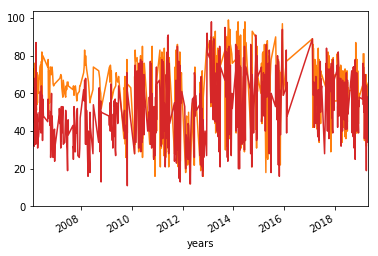

In [853]:
du=df3.loc['PL'].loc['2']
du['Részvételi arány (%)']=np.round(du['Átlagosan szavazott']/3.29)
du['Részvételi arány (%)'].hist(bins=20)
du['Részvételi arány (%)'].plot()
du=df3.loc['Other'].loc['2']
du['Részvételi arány (%)']=np.round(du['Átlagosan szavazott']/3.29)
du['Részvételi arány (%)'].hist(bins=20)
du['Részvételi arány (%)'].plot()

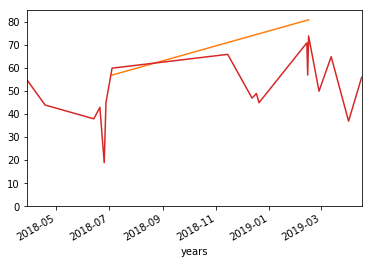

In [858]:
du=df3.loc['PL'].loc['1']
du['Részvételi arány (%)']=np.round(du['Átlagosan szavazott']/1.36)
du['Részvételi arány (%)'].hist(bins=20)
du['Részvételi arány (%)'].plot()
du=df3.loc['Other'].loc['1']
du['Részvételi arány (%)']=np.round(du['Átlagosan szavazott']/1.36)
du['Részvételi arány (%)'].hist(bins=20)
du['Részvételi arány (%)'].plot()

In [ ]:
import altair as alt

In [1055]:
df1=df.groupby(['type','camera','years','grup']).nunique()[['votid']]
df2=df.groupby(['type','camera','years','grup']).count()[['votid']]
df3=df2/df1
df3['Szavazások száma']=df1['votid']
df3['Szavazatok száma']=df2['votid']
df3['Átlagosan szavazott']=np.round(df3['votid']).astype(int)

In [1587]:
du=df3.loc['PL'].loc['2']
du=du['Átlagosan szavazott'].reset_index()
du.columns=['Szavazás időpontja','Párt','Szavazatok']

In [1588]:
du=du.set_index(['Párt','Szavazás időpontja']).sort_values(by=['Párt','Szavazás időpontja']).rolling(9).mean().reset_index()
du['Dátum']=du['Szavazás időpontja'].astype(str)

In [1589]:
du=du.dropna()
du['Szavazatok']=np.round(du['Szavazatok']).astype(int)

In [1590]:
dua=du.groupby(['Szavazás időpontja']).sum()
dua.columns=['Összesen']
du=du.set_index('Szavazás időpontja').join(dua).reset_index()
du['Eloszlás (%)']=np.round(du['Szavazatok']*100/du['Összesen'])

In [1591]:
du=du.replace('Mino.','Minorități').replace('Minoritati','Minorități').replace('Prog.','Independent')\
    .replace('neafiliat','Independent').replace('PD-L','PDL').replace('ND','PP-DD')

In [1592]:
parties=du['Párt']
for p in img['party']:
    parties=parties.replace(p, img['party'][p]['name'])
du['Párt név']=parties

In [1593]:
from colorthief import ColorThief
import requests

In [1594]:
party_imgs={}
for p in img['party']:
    i=img['party'][p]['img']
    if i:
        color_thief = ColorThief('img2/'+p.lower()+'.png')
        rgb_color=color_thief.get_color(quality=1)        
        z='#%02x%02x%02x' % rgb_color
    else:
        try:
            color_thief = ColorThief('img/'+p.lower()+'.png')
            rgb_color=color_thief.get_color(quality=1)        
            z='#%02x%02x%02x' % rgb_color
        except:
            z='grey'
    
    party_imgs[p]=z

In [1595]:
party_imgs['UDMR']='green'
party_imgs['PNL']='#f4d42c'
party_imgs['ALDE']='#046cab'

In [1596]:
colors=pd.DataFrame(party_imgs,index=['Color']).T

In [1597]:
order=list(du.groupby('Párt').sum()['Szavazatok'].sort_values().index)[::-1]
colors=pd.DataFrame(party_imgs,index=['Color']).T.loc[order]
colors['Order']=[i for i in range(len(colors))]

In [1598]:
du=du.join(colors,on='Párt')

In [1599]:
cl=du[['Párt','Color']].drop_duplicates()
cl=cl.set_index('Párt').loc[order[::-1]].reset_index()
do=[img['party'][i]['name'] for i in list(cl['Párt'])]
ra=list(cl['Color'])

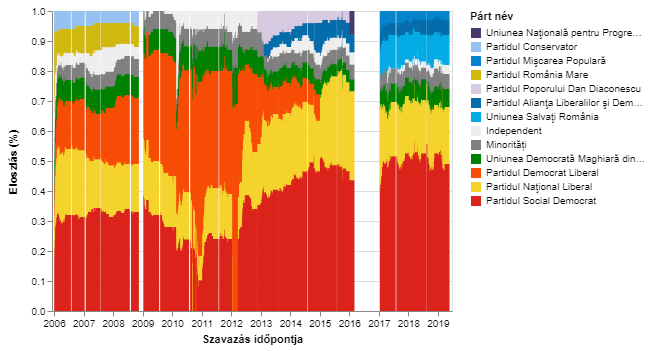

In [1826]:
alt.Chart(du).mark_bar().encode(
    x="Szavazás időpontja:T",
    y=alt.Y("Eloszlás (%):Q",stack='normalize'),
    color=alt.Color("Párt név:N",scale=alt.Scale(domain=do,range=ra)),
    order=alt.Order("Order"),
    tooltip=['Dátum', 'Párt', 'Szavazatok','Eloszlás (%)']
)#.interactive()

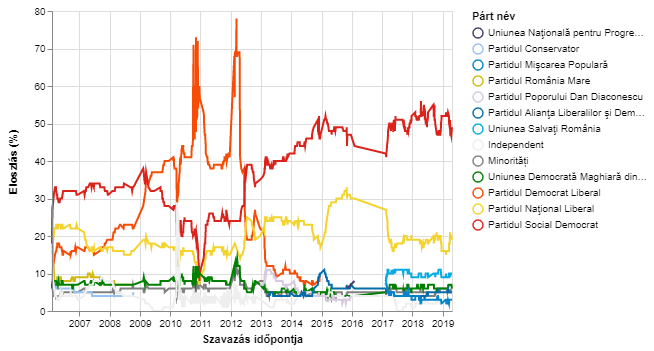

In [1827]:
alt.Chart(du).mark_line().encode(
    x="Szavazás időpontja:T",
    y=alt.Y("Eloszlás (%):Q"),
    color=alt.Color("Párt név:N",scale=alt.Scale(domain=do,range=ra)),
    tooltip=['Dátum', 'Párt', 'Szavazatok','Eloszlás (%)']
)#.interactive()

In [1602]:
race=du.drop_duplicates(subset=['Szavazás időpontja','Párt'],keep='first').set_index(['Szavazás időpontja','Párt']).unstack()['Eloszlás (%)']

In [1603]:
race=race.resample('1M').mean()
race.index=[i.month_name(locale='hu')+' '+str(i.year) for i in race.index]
race.T.to_excel('raceM.xlsx')

In [1604]:
race=du.drop_duplicates(subset=['Szavazás időpontja','Párt'],keep='first').set_index(['Szavazás időpontja','Párt']).unstack()['Eloszlás (%)']

In [1605]:
race=race.resample('1Y').mean()
race.index=[str(i.year) for i in race.index]
race=race.T

In [1607]:
plinks={}
for i in colors.index:
    print(i+':'+colors.loc[i]['Color'])
    plinks[i]='https://influence.csaladen.es/ro/img/'+i.lower()+'.png'

PSD:#db231b
PNL:#f4d42c
PDL:#f74c06
UDMR:green
Minorități:grey
Independent:#eeeeee
USR:#04abe4
ALDE:#046cab
PP-DD:#d7c9e0
PRM:#d1b80e
PMP:#0484cc
PC:#96c2f2
UNPR:#4b386d


In [1615]:
pd.DataFrame(plinks,index=['link']).T.join(race).to_excel('raceY.xlsx')

Members

In [1937]:
istart=legs['1990'][0]
iend='2019-05-01'

In [1939]:
m=nmembers['Popescu-Tariceanu Calin Constantin Anton']
data=[]
for p in m['Parties']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['party']
    d['Típus']='Párt'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
    d=dict(d)
    d['Csoportok']=p['judet']
    d['Típus']='Megye'
    data.append(d)
for p in m['Countries']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['country']
    d['Típus']='Ország'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Groups']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['group'].replace('Comisia pentru','').replace('Comisia','').strip().capitalize()
    d['Típus']='Bizottság'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Link']:
    start=pd.to_datetime(legs[p[-10:-6]][0])
    end=pd.to_datetime(legs[p[-10:-6]][1])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=szen2[int(p[-1])-1]
    d['Típus']='Kamara'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
ef=pd.DataFrame(data)
eord=ef.groupby('Típus').sum()
eord['duration']=[1,60,30,4,50]
eord.columns=['order']
ef=ef.set_index('Típus').join(eord).reset_index()

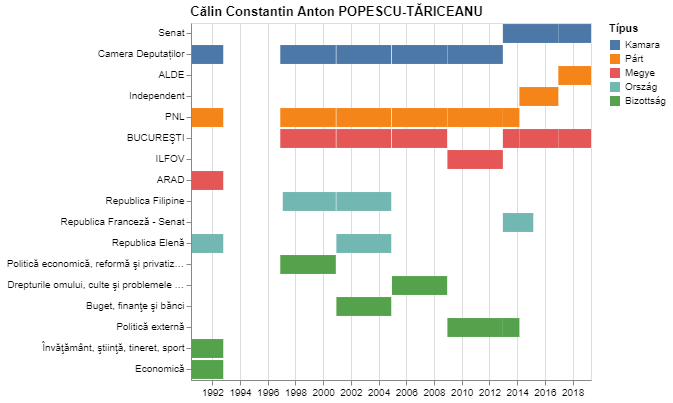

In [1940]:
alt.Chart(ef,
          title=m['Name']['full']
         ).mark_bar().encode(
    x=alt.X('start:T',title=''),
    x2='end:T',
    y=alt.Y('Csoportok:N',title='',
            sort=alt.EncodingSortField(field="order", op="mean", order='descending')),
    color=alt.Color('Típus:N',
        sort=alt.EncodingSortField(field="order", op="mean", order='descending'))
)

In [1941]:
m=nmembers['Kelemen Hunor']
data=[]
for p in m['Parties']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['party']
    d['Típus']='Párt'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
    d=dict(d)
    d['Csoportok']=p['judet']
    d['Típus']='Megye'
    data.append(d)
for p in m['Countries']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['country']
    d['Típus']='Ország'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Groups']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['group'].replace('Comisia pentru','').replace('Comisia','').strip().capitalize()
    d['Típus']='Bizottság'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Link']:
    start=pd.to_datetime(legs[p[-10:-6]][0])
    end=pd.to_datetime(legs[p[-10:-6]][1])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=szen2[int(p[-1])-1]
    d['Típus']='Kamara'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
ef=pd.DataFrame(data)
eord=ef.groupby('Típus').sum()
eord['duration']=[1,60,30,4,50]
eord.columns=['order']
ef=ef.set_index('Típus').join(eord).reset_index()

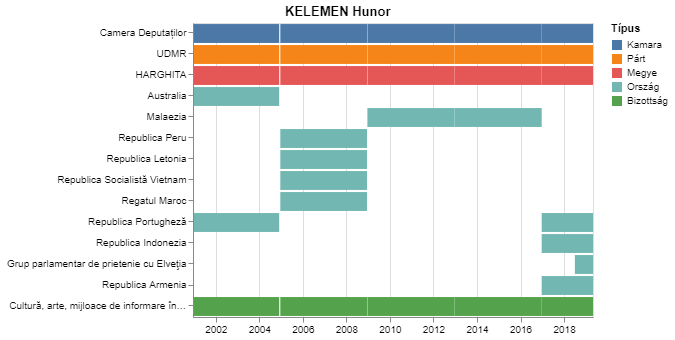

In [1942]:
alt.Chart(ef,
          title=m['Name']['full']
         ).mark_bar().encode(
    x=alt.X('start:T',title=''),
    x2='end:T',
    y=alt.Y('Csoportok:N',title='',
            sort=alt.EncodingSortField(field="order", op="mean", order='descending')),
    color=alt.Color('Típus:N',
        sort=alt.EncodingSortField(field="order", op="mean", order='descending'))
)

In [1949]:
m=nmembers['Dragnea Nicolae-Liviu']
data=[]
for p in m['Parties']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['party']
    d['Típus']='Párt'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
    d=dict(d)
    d['Csoportok']=p['judet']
    d['Típus']='Megye'
    data.append(d)
for p in m['Countries']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['country']
    d['Típus']='Ország'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Groups']:
    start=pd.to_datetime(p['start'])
    end=pd.to_datetime(p['end'])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=p['group'].replace('Comisia pentru','').replace('Comisia','').strip().capitalize()
    d['Típus']='Bizottság'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
for p in m['Link']:
    start=pd.to_datetime(legs[p[-10:-6]][0])
    end=pd.to_datetime(legs[p[-10:-6]][1])    
    d={}
    d['Name']=m['Name']['full']
    d['Csoportok']=szen2[int(p[-1])-1]
    d['Típus']='Kamara'
    d['start']=start
    d['end']=end
    d['duration']=pd.to_timedelta(end-start).days
    data.append(d)
ef=pd.DataFrame(data)
eord=ef.groupby('Típus').sum()
eord['duration']=[1,60,30,4,50]
eord.columns=['order']
ef=ef.set_index('Típus').join(eord).reset_index()

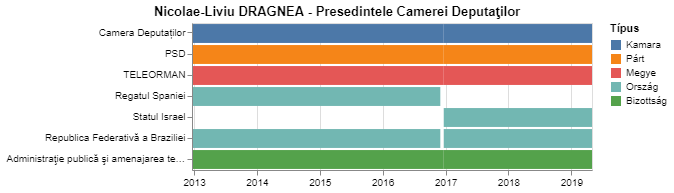

In [1953]:
alt.Chart(ef,
          title=m['Name']['full'].replace('DRAGNEA','DRAGNEA - ')
         ).mark_bar().encode(
    x=alt.X('start:T',title=''),
    x2='end:T',
    y=alt.Y('Csoportok:N',title='',
            sort=alt.EncodingSortField(field="order", op="mean", order='descending')),
    color=alt.Color('Típus:N',
        sort=alt.EncodingSortField(field="order", op="mean", order='descending'))
)